# Prueba Intertrimestral

**Nombre:**  
**Apellidos:**  

**Tiempo de la prueba:** 2 horas  
**Asignatura:** Desarrollo de Aplicaciones para la Visualización de Datos  
**Fecha:** 16 de octubre de 2025  

## Instrucciones

- Escribe **código limpio y autoexplicativo**.  
- Se pueden utilizar **los materiales de clase**.  
- Se puede utilizar **internet** para búsqueda de dudas y documentación.  
- **No se puede utilizar ningún tipo de LLM** (ChatGPT, Copilot, Gemini, etc.).  
- **No se puede utilizar mensajería instantánea**.  
- Al finalizar, **sube tu notebook a GitHub** y envía el enlace del fichero en el siguiente formulario:  
[https://forms.office.com/e/LFVwu9z6uQ](https://forms.office.com/e/LFVwu9z6uQ)


## Dataset “Life Style Data”

El dataset contiene información sobre hábitos de vida (alimentación, sueño, ejercicio, consumo de tabaco o alcohol, etc.) y medidas de salud (IMC, presión arterial, etc.) para diferentes individuos.

Puedes descargarlo del repositorio de la asignatura y un .txt con la descripción de las variables.


## Inicialización de librerías

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from itertools import combinations

import pandas as pd
import numpy as np
import sklearn.datasets

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    classification_report,
    confusion_matrix
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.model_selection import train_test_split

# Ejercicio 1 — Programación (2 puntos)

a) (0.6 pts) Crea una función imc(weight, height) que devuelva el índice de masa corporal (IMC), redondeado a dos decimales.



In [6]:
def imc(weight, height):
    return round(weight/(height**2),2)

b) (0.6 pts) Crea una función saludable(imcValue) que devuelva "Saludable" si el IMC está entre 18.5 y 24.9, "Bajo peso" si es menor de 18.5, o "Sobrepeso" si es mayor de 24.9.

In [7]:
def saludable(imcValue):
    if imcValue < 18.5:
        return "Bajo peso"
    if imcValue > 24.9:
        return "Sobrepeso"
    return "Saludable"


c) (0.6 pts) Genera un DataFrame llamado imcData que contenga al menos 10 registros con las siguientes columnas:


*   peso (en kilogramos)

*   altura (en metros)

*   imc (calculado usando la función imc(weight, height) creada anteriormente)

Puedes generar los datos de peso y altura manualmente, mediante listas, o de forma aleatoria utilizando numpy (np.random.uniform o similar).

Añade una cuarta columna llamada categoria, cuyos valores provengan de la función saludable(imcValue).

Muestra las primeras filas del DataFrame resultante y comprueba que los tipos de datos son correctos.

In [91]:
np.random.seed(42)
peso=np.random.uniform(50,120,12)
altura=np.random.uniform(1.5,2.0,12)
imc_vals=[imc(w,h) 
          for w,h in zip(peso,altura)]
categoria=[saludable(v) 
           for v in imc_vals]
imcData=pd.DataFrame({"peso":peso,"altura":altura,"imc":imc_vals,"categoria":categoria})
print(imcData.head())
print(imcData.dtypes)

#Meto lo del zip que he encontrado por

         peso    altura    imc  categoria
0   76.217808  1.916221  20.76  Saludable
1  116.550001  1.606170  45.18  Sobrepeso
2  101.239576  1.590912  40.00  Sobrepeso
3   91.906094  1.591702  36.28  Sobrepeso
4   60.921305  1.652121  22.32  Saludable
peso         float64
altura       float64
imc          float64
categoria     object
dtype: object


d) (0.2 pts) ¿Cómo podrías integrar ambas funciones dentro de una clase llamada HealthTools que calcule el IMC y clasifique automáticamente a partir de listas de pesos y alturas?

In [18]:
class HealthTools:
    def imc(weight, height):
        return round(weight/(height**2),2)

    def saludable(imcValue):
        if imcValue < 18.5:
            return "Bajo peso"
        if imcValue > 24.9:
            return "Sobrepeso"
        return "Saludable"
    
    np.random.seed(42)
    peso=np.random.uniform(50,120,12)
    altura=np.random.uniform(1.5,2.0,12)
    imc_vals=[imc(w,h) 
              for w,h in zip(peso,altura)]
    categoria=[saludable(v) 
               for v in imc_vals]
    imcData=pd.DataFrame({"peso":peso,"altura":altura,"imc":imc_vals,"categoria":categoria})
    print(imcData.head())
    print(imcData.dtypes)
    
ht=HealthTools()
print(ht)

         peso    altura    imc  categoria
0   76.217808  1.916221  20.76  Saludable
1  116.550001  1.606170  45.18  Sobrepeso
2  101.239576  1.590912  40.00  Sobrepeso
3   91.906094  1.591702  36.28  Sobrepeso
4   60.921305  1.652121  22.32  Saludable
peso         float64
altura       float64
imc          float64
categoria     object
dtype: object


## Ejercicio 2 — Exploración y visualización (3 puntos)

a) (0.75 pts) Carga el dataset desde el fichero CSV y guárdalo en un DataFrame llamado lifeStyleData. Muestra las 5 primeras filas, el número de filas y columnas.

In [19]:
lifeStyleData=pd.read_csv("Final_data.csv")
print(lifeStyleData.head())
print(lifeStyleData.shape)

     Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  34.91    Male        65.27        1.62   188.58   157.65        69.05   
1  23.37  Female        56.41        1.55   179.43   131.75        73.18   
2  33.20  Female        58.98        1.67   175.04   123.95        54.96   
3  38.69  Female        93.78        1.70   191.21   155.10        50.07   
4  45.09    Male        52.42        1.88   193.58   152.88        70.84   

   Session_Duration (hours)  Calories_Burned Workout_Type  ...  \
0                      1.00          1080.90     Strength  ...   
1                      1.37          1809.91         HIIT  ...   
2                      0.91           802.26       Cardio  ...   
3                      1.10          1450.79         HIIT  ...   
4                      1.08          1166.40     Strength  ...   

   cal_from_macros  pct_carbs  protein_per_kg   pct_HRR  pct_maxHR  \
0          2139.59   0.500432        1.624789  0.741237   0.835985   
1     

b) (0.75 pts) Crea una función describeData(dataFrame) que devuelva para cada columna: tipo de dato, número de valores nulos y porcentaje de nulos.

In [92]:
def describeData(dataFrame):
    n=len(dataFrame)
    tipo_dato=dataFrame.dtypes.astype(str)
    nulls=dataFrame.isna().sum()
    porcentaje_nulos=(nulls/n*100).round(2)
    return pd.DataFrame({"Tipo":tipo_dato,"Nulos":nulls,"Porcentaje":porcentaje_nulos})
variableData=describeData(lifeStyleData)
print(variableData)

                                   Tipo  Nulos  Porcentaje
Age                             float64      0         0.0
Gender                           object      0         0.0
Weight (kg)                     float64      0         0.0
Height (m)                      float64      0         0.0
Max_BPM                         float64      1         0.0
Avg_BPM                         float64      1         0.0
Resting_BPM                     float64      0         0.0
Session_Duration (hours)        float64      0         0.0
Calories_Burned                 float64      0         0.0
Workout_Type                     object      0         0.0
Fat_Percentage                  float64      0         0.0
Water_Intake (liters)           float64      0         0.0
Workout_Frequency (days/week)   float64      0         0.0
Experience_Level                float64      0         0.0
BMI                             float64      0         0.0
Daily meals frequency           float64      0         0

c) (0.75 pts) Usa describeData(lifeStyleData) y comenta brevemente (2–3 líneas) qué variables parecen tener más valores faltantes.

In [39]:
ordenVariables=variableData.sort_values("Nulos",ascending=False).head(10)
print("Las variables con mayor proporción de valores nulos se pueden observar a continación:" ) 
for idx,row in ordenVariables.iterrows():
    print(f"{idx}: {row['Nulos']} nulos ({row['Porcentaje']}%)")
    



Las variables con mayor proporción de valores nulos se pueden observar a continación:
cholesterol_mg: 1 nulos (0.0%)
Max_BPM: 1 nulos (0.0%)
Avg_BPM: 1 nulos (0.0%)
Age: 0 nulos (0.0%)
Type of Muscle: 0 nulos (0.0%)
rating: 0 nulos (0.0%)
Name of Exercise: 0 nulos (0.0%)
Sets: 0 nulos (0.0%)
Reps: 0 nulos (0.0%)
Benefit: 0 nulos (0.0%)


Como se puede apreciar en el cuadro superior, las variables cholesterol, Max_BPM y Avg_BPM son aquellas con nulos detectados

d) (0.75 pts) Realiza un gráfico que muestre las correlaciones entre variables numéricas. ¿Hay alguna correlación fuerte o inesperada?

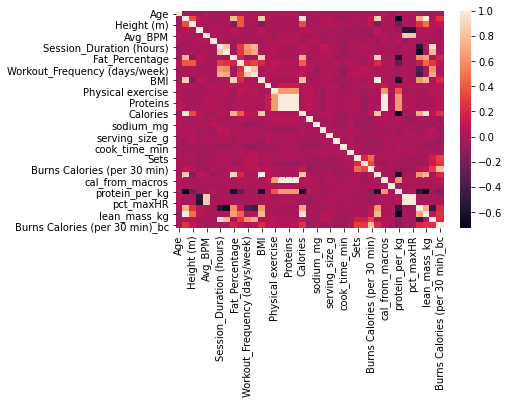

In [45]:
num_cols=lifeStyleData.select_dtypes(include=[np.number])
corr=num_cols.corr()
plt.figure()
sns.heatmap(corr,annot=False)
plt.show()




Se ve una clara correlación entre la cantidad de ejercicio físico y la cantidad de proteinas y calorías consumidas, relación lógica ya que cuanto mas ejercicio se haga más calorias se deben consumir para suplir las calorías quemadas en la actividad física y más proteínas se deben consumir para reparar las microroturas de los músculos ejercitados

A su vez, y menos interesantemente, variables similares entre sí tienen mucha correlación (calorias de macros, con caloras, con proteinas, con proteinas por kilo etc.)




## Ejercicio 3 — Regresión básica (2 puntos)

Queremos predecir una variable de salud continua, por ejemplo bmi.

a) (0.25 pts) Define targetVar = "bmi" y selecciona 2–3 variables predictoras (por ejemplo sleepHours, activityLevel, calories). Guarda las columnas predictoras en X y la variable objetivo en y.

In [55]:
targetVar = "BMI"
predictors = ["Calories", "Workout_Frequency (days/week)", "Water_Intake (liters)"]
X = lifeStyleData[predictors]
y = lifeStyleData[targetVar]
print(X.head())
print(y.head())

   Calories  Workout_Frequency (days/week)  Water_Intake (liters)
0    1806.0                           3.99                   1.50
1    1577.0                           4.00                   1.90
2    1608.0                           2.99                   1.88
3    2657.0                           3.99                   2.50
4    1470.0                           4.00                   2.91
0    24.87
1    23.48
2    21.15
3    32.45
4    14.83
Name: BMI, dtype: float64


In [53]:
print(lifeStyleData.columns)


Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins',
       'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g',
       'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method',
       'prep_time_min', 'cook_time_min', 'rating', 'Name of Exercise', 'Sets',
       'Reps', 'Benefit', 'Burns Calories (per 30 min)', 'Target Muscle Group',
       'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle',
       'Workout', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg',
       'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn',
       'Burns Calories (per 30 min)_bc', 'Burns_Calories_Bin'],
      dtype='object')


b) (0.25 pts) Divide los datos en entrenamiento (70 %) y prueba (30 %).

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape,X_test.shape)


(14000, 3) (6000, 3)


c) (0.75 pts) Entrena un modelo de regresión lineal (LinearRegression) y calcula el R² y el MSE.

In [65]:
lin = LinearRegression().fit(X_train, y_train)
y_pred_lin = lin.predict(X_test)
print("R2:", r2_score(y_test, y_pred_lin))
print("MSE:", mean_squared_error(y_test, y_pred_lin))


R2: 0.724567568119475
MSE: 12.594321202368432


d) (0.75 pts) Entrena un RandomForestRegressor con los mismos datos y compara resultados. ¿Cuál tiene mejor rendimiento?

In [66]:
rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

r2_lin = r2_score(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(("LinearRegression", "R2", r2_lin, "MSE", mse_lin))
print(("RandomForest", "R2", r2_rf, "MSE", mse_rf))
print("Mejor:", "RandomForest" if r2_rf > r2_lin else "LinearRegression")


('LinearRegression', 'R2', 0.724567568119475, 'MSE', 12.594321202368432)
('RandomForest', 'R2', 0.7775954158949547, 'MSE', 10.169589506849059)
Mejor: RandomForest


Como puede apreciarse en los resultados resumidos en las celdas superiores, el modelo de Random Forest produce un mejor resultado que la Regresión Lineal, ya que tiene un R2 más alto y un Mean Squared Error menor

## Ejercicio 4 — Clasificación sencilla (2 puntos)

Crea una nueva variable binaria que indique si el IMC está dentro del rango saludable.

a) (0.25 pts) Crea una nueva columna bmiHealthy donde el valor sea 1 si bmi está entre 18.5 y 24.9, y 0 en caso contrario.

In [86]:
lifeStyleData["bmiHealthy"]=((lifeStyleData["BMI"]>=18.5)&(lifeStyleData["BMI"]<=24.9)).astype(int)
print(lifeStyleData["bmiHealthy"].value_counts(dropna=False))


bmiHealthy
0    12392
1     7608
Name: count, dtype: int64


b) (0.75 pts) Entrena un modelo de regresión logística (LogisticRegression) para predecir bmiHealthy usando algunas variables de estilo de vida (por ejemplo sleepHours, activityLevel, calories).

In [93]:
predictors_cls = ["Calories", "Workout_Frequency (days/week)", "lean_mass_kg", "Physical exercise"]
Xc = lifeStyleData[predictors_cls]
yc = lifeStyleData["bmiHealthy"]

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.3, random_state=42)
logr = LogisticRegression(max_iter=1000).fit(Xc_train, yc_train)



c) (0.25 pts) Calcula la exactitud (accuracy) del modelo y muestra la matriz de confusión.


In [94]:
yc_pred = logr.predict(Xc_test)
print("Accuracy:", accuracy_score(yc_test, yc_pred))
print(confusion_matrix(yc_test, yc_pred))


Accuracy: 0.6153333333333333
[[2895  812]
 [1496  797]]


In [95]:
target = "bmiHealthy"
X = lifeStyleData.drop(columns=[target, "BMI"], errors="ignore").select_dtypes(include=[np.number]).fillna(0)
y = lifeStyleData[target]

model = LogisticRegression(max_iter=1000).fit(X, y)
coef = pd.Series(model.coef_[0], index=X.columns)
coef_abs = coef.abs().sort_values(ascending=False)
print(coef_abs)


Burns Calories (per 30 min)_bc    5.552415e-21
Calories                          2.660948e-37
cal_balance                       2.325695e-37
cal_from_macros                   1.248603e-37
sodium_mg                         6.073842e-38
Calories_Burned                   3.352530e-38
expected_burn                     2.799212e-38
serving_size_g                    2.213544e-38
Burns Calories (per 30 min)       2.017309e-38
Carbs                             1.560070e-38
Max_BPM                           1.174486e-38
Weight (kg)                       1.035691e-38
Avg_BPM                           9.364813e-39
Proteins                          6.246776e-39
lean_mass_kg                      5.991025e-39
cholesterol_mg                    4.913722e-39
Fats                              4.163379e-39
Resting_BPM                       4.099678e-39
BMI_calc                          3.743653e-39
cook_time_min                     3.581946e-39
Fat_Percentage                    3.188336e-39
Age          

In [96]:
predictors_cls = ["Calories", "Burns Calories (per 30 min)_bc", "cal_balance", "cal_from_macros", "sodium_mg"]
Xc = lifeStyleData[predictors_cls]
yc = lifeStyleData["bmiHealthy"]

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.3, random_state=42)
logr = LogisticRegression(max_iter=1000).fit(Xc_train, yc_train)

from sklearn.metrics import accuracy_score, confusion_matrix

yc_pred = logr.predict(Xc_test)
print("Accuracy:", accuracy_score(yc_test, yc_pred))
print(confusion_matrix(yc_test, yc_pred))


Accuracy: 0.6178333333333333
[[3707    0]
 [2293    0]]


In [97]:
predictors_cls = ["Physical exercise", "protein_per_kg", "pct_carbs", "Experience_Level", "pct_HRR"]
Xc = lifeStyleData[predictors_cls]
yc = lifeStyleData["bmiHealthy"]

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.3, random_state=42)
logr = LogisticRegression(max_iter=1000).fit(Xc_train, yc_train)

from sklearn.metrics import accuracy_score, confusion_matrix

yc_pred = logr.predict(Xc_test)
print("Accuracy:", accuracy_score(yc_test, yc_pred))
print(confusion_matrix(yc_test, yc_pred))


Accuracy: 0.595
[[3354  353]
 [2077  216]]


d) (0.75 pts) Explica qué variable parece influir más según el modelo.

Como se puede ver en las celdas superiores las variables que influyen más en el modelo (positivamente) son las relacionadas con el consumo calórico y la ingesta calórica, especialmente cuantas calorías quema el usuario en cuestión cada 30 minutos

## Ejercicio 5 — Conclusión (1 punto)

En un máximo de 300 palabras, resume:

*   Qué hábitos parecen tener mayor relación con el estado de salud.

*   Qué modelo fue más eficaz y por qué.

*   Qué podrías mejorar si tuvieras más tiempo o datos.



Los hábitos que parecen tener mayor relación con el estado de salud, como he comentado anteriormente, son aquellos principalmente relacionados con su consumo calórico. Esto es interesante, ya que las caloras quemadas Y las calorías ingeridas tienen un mayor efecto en el usuario que otras métricas como la frecuencia y tipo de ejercicio, la frecuencia de comidas etc. Es decir, es más importante las calorías netas de lo que consumes que otras cosas menos importantes como en cuantas comidas, cuanto azucar, cuanto agua etc. De la mismfa forma, es más importante cuámntas calorias quemas haciendo deporte que el tipo de deporte efectuado o su frecuencia.

El modelo más eficaz fue el primero, la regresión lineal, ya que tuvo un R2 superior y un error menor en comparación con la regresión logística efectuada a la nueva variable del ejercicio 4

Si tuviese más tiempo, para mejorar el modelo del ejercicio 4, habiéndome fijado en que hay muchos más 0s que 1s para la variable bmiHealthy, trataría de forjar un dataset con un número similar de casos positivos y de casos negativos, ya que sino (y como puede observarse en este apartado) el modelo tendrá a infraestimar el resultado menos representado en el deataset (en este caso los 1s)